## EDA

* EDA is the process of data understanding on Validated data
* In statistics, Exploratory Data Analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

* EDA will follow two concepts, 
    - Stats
        - Descriptive
    - Visual Analysis

### TOC <a id='menu'>

* [0. Data](#dc)
* [1. Data Validation and Normalization](#dv)
* [2. EDA](#eda)
    * [2.1 Types of Variables/Columns](#vartype)
    * [2.2 Analysis](#ans)
        * [2.2.1 Uni-Variate Analysis](#uni)
        * [2.2.2 Bi-Variate Analysis](#bi)
        * [2.2.3 Multi-Variate Analysis](#mul)
    * [Insights](#insights)

### 0. Data

[Back to Menu](#menu)

In [1]:
# Base libraries

import pandas as pd
import numpy as np

* **Loading Video Game Sales Data**

  - DataSources: Kaggle

In [2]:
# Data Loading

raw = pd.read_csv("Video_Games_Sales.csv")

                                                            Basic Checks

In [3]:
raw.shape

(16719, 16)

In [4]:
raw.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [5]:
raw.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

                                                        Columns info:

    Alongside the fields: 
    
    Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, 
    
    we have:-

        Critic_score - Aggregate score compiled by Metacritic staff
        Critic_count - The number of critics used in coming up with the Critic_score
        User_score - Score by Metacritic's subscribers
        User_count - Number of users who gave the user_score
        Developer - Party responsible for creating the game
        Rating - The ESRB ratings

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### 1. Data Validation <a id='dv'>

[Back to Menu](#menu)

* Duplicates Rows Check
    - Checking and droping duplicated rows for data leakage

In [6]:
# Converting Text Cols to lower case as python is case sensitive

for col in raw.columns:
    if raw[col].dtype==object:
        raw[col] = raw[col].str.lower()

In [7]:
raw.head(2)

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  \
0         wii sports      wii           2006.0    sports  nintendo     41.36   
1  super mario bros.      nes           1985.0  platform  nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
1      3.58      6.81         0.77         40.24           NaN           NaN   

  User_Score  User_Count Developer Rating  
0          8       322.0  nintendo      e  
1        NaN         NaN       NaN    NaN

* Column Data Validation

In [8]:
# Shortcode for checking each column unique values

for col in raw.columns:
    print(f"Column: {col}")
    print()
    print(f"Data Type of Column: {raw[col].dtype}")
    print()
    print("Column Values:")
    print(raw[col].unique())
    print("=================================================================")
    print()

Column: Name

Data Type of Column: object

Column Values:
['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']

Column: Platform

Data Type of Column: object

Column Values:
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']

Column: Year_of_Release

Data Type of Column: float64

Column Values:
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]

Column: Genre

Data Type of Column: object

Column Values:
['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' nan]

Column: Publisher

Data Type of Column: ob

    - All the data is valid and belongs to columns
        - In User_Score we have tbd, replacing it with nan, converting it into Number
        - Year of Release in Float, Taking it as Date Time

In [9]:
raw.User_Score.replace({'tbd':np.nan}, inplace=True)
raw.User_Score = raw.User_Score.astype(float)

C:\Users\Koushil Goud\AppData\Local\Temp\ipykernel_27304\4252112663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw.User_Score.replace({'tbd':np.nan}, inplace=True)


In [10]:
# Converting Year of Release column to proper date time

raw.Year_of_Release = pd.to_datetime(raw.Year_of_Release, format='%Y')

In [11]:
# Duplicated Rows Check

raw[raw.duplicated()]

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating]
Index: []

    No Duplicates Found

In [12]:
# Validating Col Data Types
raw.dtypes

Name                       object
Platform                   object
Year_of_Release    datetime64[ns]
Genre                      object
Publisher                  object
NA_Sales                  float64
EU_Sales                  float64
JP_Sales                  float64
Other_Sales               float64
Global_Sales              float64
Critic_Score              float64
Critic_Count              float64
User_Score                float64
User_Count                float64
Developer                  object
Rating                     object
dtype: object

### 2. EDA (Data Insights from stats methods) <a id='eda'>
    
[Back to Menu](#menu)

* Insights we can look in for this data from EDA:
    - Checking Sales Value Ranges
    - Genre Wise Sales
    - Relations Between Sales
    - Ratings vs Rating Counts
    - etc..

In [13]:
# Viz Libraries

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Taking Non Null Data for Analysis

data = raw.dropna().reset_index(drop=True)

**2.1 Identifying Variables Types according to stats** <a id='vartype'>
   
[Back to Menu](#menu)

In [15]:
data.shape

(6825, 16)

In [17]:
data.head(2)

Name Platform Year_of_Release   Genre Publisher  NA_Sales  \
0      wii sports      wii      2006-01-01  sports  nintendo     41.36   
1  mario kart wii      wii      2008-01-01  racing  nintendo     15.68   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
1     12.76      3.79         3.29         35.52          82.0          73.0   

   User_Score  User_Count Developer Rating  
0         8.0       322.0  nintendo      e  
1         8.3       709.0  nintendo      e

Numeric (Quntitative)|Categorical (Qualitative)
---------|--------------
NA_Sales (c)|Name (nom)
EU_Sales (c)|Platform (nom)
JP_Sales (c)|Genre (nom)
Other_Sales (c)|Publisher (nom)
Golbal_Sales (c)|Developer (nom)
Critic_Score (c)|Rating (ord)
Critic_Count (d)|
User_Score (c)|
User_Count (d)|

                                                Date Time Data: Year of Release

**2.2 Analysis** <a id='ans'>

[Back to Menu](#menu)
    
    
EDA can be further divided into three types of analysis


Uni-Variate|Bi-Variate|Multi-Variate
---|---|----
Data study of single column|Data study between two columns|Data Study b/w three or more columns

**2.2.1 Uni-Variate Analysis - Study of Individual Column data** <a id='uni'>

[Back to Menu](#menu)

- Descriptive Stats Univariate measures,
    - Numeric
        - Discrete
            - round(Mean), round(Median), Mode, Five Number Summary, Std, Skewness, Kurtosis
        - Continuous
            - - Mean, Median, Five Number Summary, Std, Skewness, Kurtosis
    - Categorical & Boolean
        - nunique
        - unique
        - FDT
        - Mode
    - Date Time 
        - Start Date, End Date

In [18]:
data.head(2)

Name Platform Year_of_Release   Genre Publisher  NA_Sales  \
0      wii sports      wii      2006-01-01  sports  nintendo     41.36   
1  mario kart wii      wii      2008-01-01  racing  nintendo     15.68   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
1     12.76      3.79         3.29         35.52          82.0          73.0   

   User_Score  User_Count Developer Rating  
0         8.0       322.0  nintendo      e  
1         8.3       709.0  nintendo      e

* **From User-Defined Module**

In [2]:
from DSProjLib.Eda import univariate

In [5]:
univariate(data)

NameError: name 'data' is not defined

**Uni-Variate Insights**

* Top Platforms in the data are ps2, x360, ps3, pc contributing almost 50% of the data
* Data belongs from 1985 to 2016
    - Upto 1999 few games were sold, most of the game sales are happened after 1999
* Action, Sports, Shooter, Roleplaying Genre Games are having 50% of the data share
* Electronic Arts Publisher having Highest Games Count
* All the Sales average is less than 1 million
* Outliers present in most of numeric column data
* Most of the Games belongs to Teen, Everyone, Mature Ratings

**2.2.2 Bi-Variate Analysis - Study of Data between two columns** <a id='bi'>

[Back to Menu](#menu)

**In the Bi-Variate we have these combinations**

- Descriptive Stats Measures used to study data between two columns

**Bi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric**|**Correlation (-1 to +1)**
**Numeric-Categorical**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical**|**FDT**

**Notes:**

   - Correlation Coeffiecient Relation Categories

                0.75 to 1 - Strong Correlation
                0.50 to 0.75 - Moderate Correlation
                <0.50 - Weak Correlation

**Selecting two columns combos based on business talks , to understand the relations**

In [21]:
data.head(2)

Name Platform Year_of_Release   Genre Publisher  NA_Sales  \
0      wii sports      wii      2006-01-01  sports  nintendo     41.36   
1  mario kart wii      wii      2008-01-01  racing  nintendo     15.68   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.53          76.0          51.0   
1     12.76      3.79         3.29         35.52          82.0          73.0   

   User_Score  User_Count Developer Rating  
0         8.0       322.0  nintendo      e  
1         8.3       709.0  nintendo      e

N-N|N-C|C-C
-----|-----|-----
Critic_Score vs Critic_Count|Genre vs Global_Sales|Genre vs Rating
User_Score vs User_Count |Platform vs Sales |Platform vs Rating

**N-N**

* Descriptive Stats

In [22]:
# correlation cofficient

print("Critic_Count vs Critic_Score:")

display(round(data[['Critic_Count', 'Critic_Score']].corr(),2))

Critic_Count vs Critic_Score:


Critic_Count  Critic_Score
Critic_Count           1.0           0.4
Critic_Score           0.4           1.0

* Visual Analysis

In [23]:
plt.figure(figsize=(4, 3))
px.scatter(data, x='Critic_Count', y='Critic_Score', trendline='ols', trendline_color_override='black', width=600, height=350)

# data between two columns was shown in points in x & y axes

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

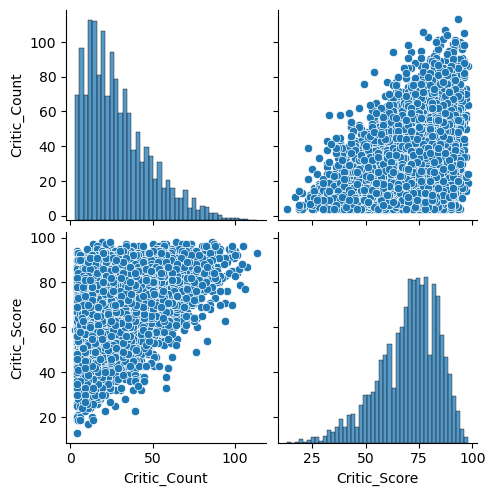

In [24]:
plt.figure(figsize=(4, 3))
sns.pairplot(data[['Critic_Count', 'Critic_Score']])

Insights:

* The data shows that there is positive correlation between Count vs Rating
    - when the count increases , rating might increase with a chance of 40%

**N-C**

* Desc Stats

In [25]:
# We can use pandas groupby to get aggregation values of each class

print("Genre vs Global Sales:")

display(round(data.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False), 2))

Genre vs Global Sales:


Genre
misc            1.08
shooter         0.94
platform        0.94
sports          0.88
racing          0.82
action          0.74
role-playing    0.70
simulation      0.68
puzzle          0.67
fighting        0.66
adventure       0.33
strategy        0.26
Name: Global_Sales, dtype: float64

* Visual Analysis

In [26]:
px.box(data, x="Genre", y="Global_Sales")

Insights:

* Adventure & Strategy Genres are having less average sales compared to other

**C-C**

* Descriptive stats

In [27]:
# We can use crosstab function in pandas to get FDT (Frequency Distribution Table) of each class

print("Genre vs Rating:")

display(pd.crosstab(data.Genre, data.Rating, margins=True))

Genre vs Rating:


Rating        ao     e  e10+  k-a     m  rp     t   All
Genre                                                  
action         1   191   299    0   557   0   582  1630
adventure      0    49    32    0    85   0    82   248
fighting       0     6    14    0    45   0   313   378
misc           0   163    80    1    11   0   129   384
platform       0   240   104    0     3   0    56   403
puzzle         0    89    24    0     0   0     5   118
racing         0   350    79    0    17   0   135   581
role-playing   0    73   100    0   152   0   387   712
shooter        0    22    34    0   523   0   285   864
simulation     0   103    28    0     5   0   161   297
sports         0   754    74    0    11   0   104   943
strategy       0    42    62    0    24   1   138   267
All            1  2082   930    1  1433   1  2377  6825

Insights:

* Count is not equal in all the categories , means we have categories with higher importance

**2.2.3 Multi-Variate Analysis**<a id='mul'>

[Back to Menu](#menu)

- Descriptive Stats Measures used to study data between three or more columns

**Multi-Variate Combo**|**Stats Measures**
----|-----------
**Numeric-Numeric-Numeric**|**Correlation (-1 to +1)**
**Numeric-Categorical-Numeric**|**Aggregation Functions (count, min, max, avg, sum)**
**Categorical-Categorical-Categorical**|**FDT**

**Notes:**

   - Correlation Coeffiecient Relation Categories

                0.75 to 1 - Strong Correlation
                0.50 to 0.75 - Moderate Correlation
                <0.50 - Weak Correlation

N-N-N----|N-C-N---|C-C-C----
-----|-----|-----
All Numeric Columns|Genre vs Sales Vs Rating|Genre Vs Platform Vs Rating

**N-N-N**

* Desc Stats

In [28]:
data.head()

Name Platform Year_of_Release     Genre Publisher  \
0             wii sports      wii      2006-01-01    sports  nintendo   
1         mario kart wii      wii      2008-01-01    racing  nintendo   
2      wii sports resort      wii      2009-01-01    sports  nintendo   
3  new super mario bros.       ds      2006-01-01  platform  nintendo   
4               wii play      wii      2006-01-01      misc  nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     15.68     12.76      3.79         3.29         35.52          82.0   
2     15.61     10.93      3.28         2.95         32.77          80.0   
3     11.28      9.14      6.50         2.88         29.80          89.0   
4     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count  User_Score  User_Count Developer Rating  
0          51.0         8.0       322.0  nintendo      e  
1          73.0         8.3       709.0  nintendo      e  
2          73.0         8.0       192.0  nintendo      e  
3          65.0         8.5       431.0  nintendo      e  
4          41.0         6.6       129.0  nintendo      e

In [29]:
data.corr()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
NA_Sales      1.000000  0.841808  0.468607     0.726757      0.955793   
EU_Sales      0.841808  1.000000  0.519929     0.716330      0.939313   
JP_Sales      0.468607  0.519929  1.000000     0.394823      0.613546   
Other_Sales   0.726757  0.716330  0.394823     1.000000      0.804028   
Global_Sales  0.955793  0.939313  0.613546     0.804028      1.000000   
Critic_Score  0.233580  0.213102  0.147314     0.191509      0.237556   
Critic_Count  0.283917  0.265740  0.168299     0.239513      0.290397   
User_Score    0.085796  0.055915  0.127521     0.057083      0.088349   
User_Count    0.246208  0.283504  0.072773     0.240085      0.264151   

              Critic_Score  Critic_Count  User_Score  User_Count  
NA_Sales          0.233580      0.283917    0.085796    0.246208  
EU_Sales          0.213102      0.265740    0.055915    0.283504  
JP_Sales          0.147314      0.168299    0.127521    0.072773  
Other_Sales       0.191509      0.239513    0.057083    0.240085  
Global_Sales      0.237556      0.290397    0.088349    0.264151  
Critic_Score      1.000000      0.396478    0.580318    0.265639  
Critic_Count      0.396478      1.000000    0.195087    0.365603  
User_Score        0.580318      0.195087    1.000000    0.017546  
User_Count        0.265639      0.365603    0.017546    1.000000

* Visualizations

<Axes: >

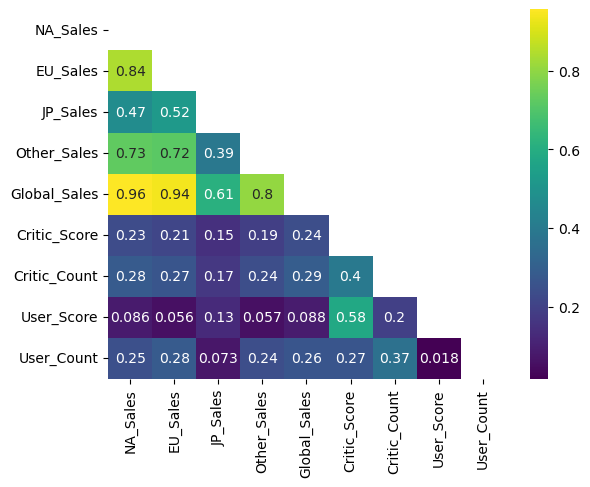

In [30]:
lower = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, cmap='viridis', mask=lower)

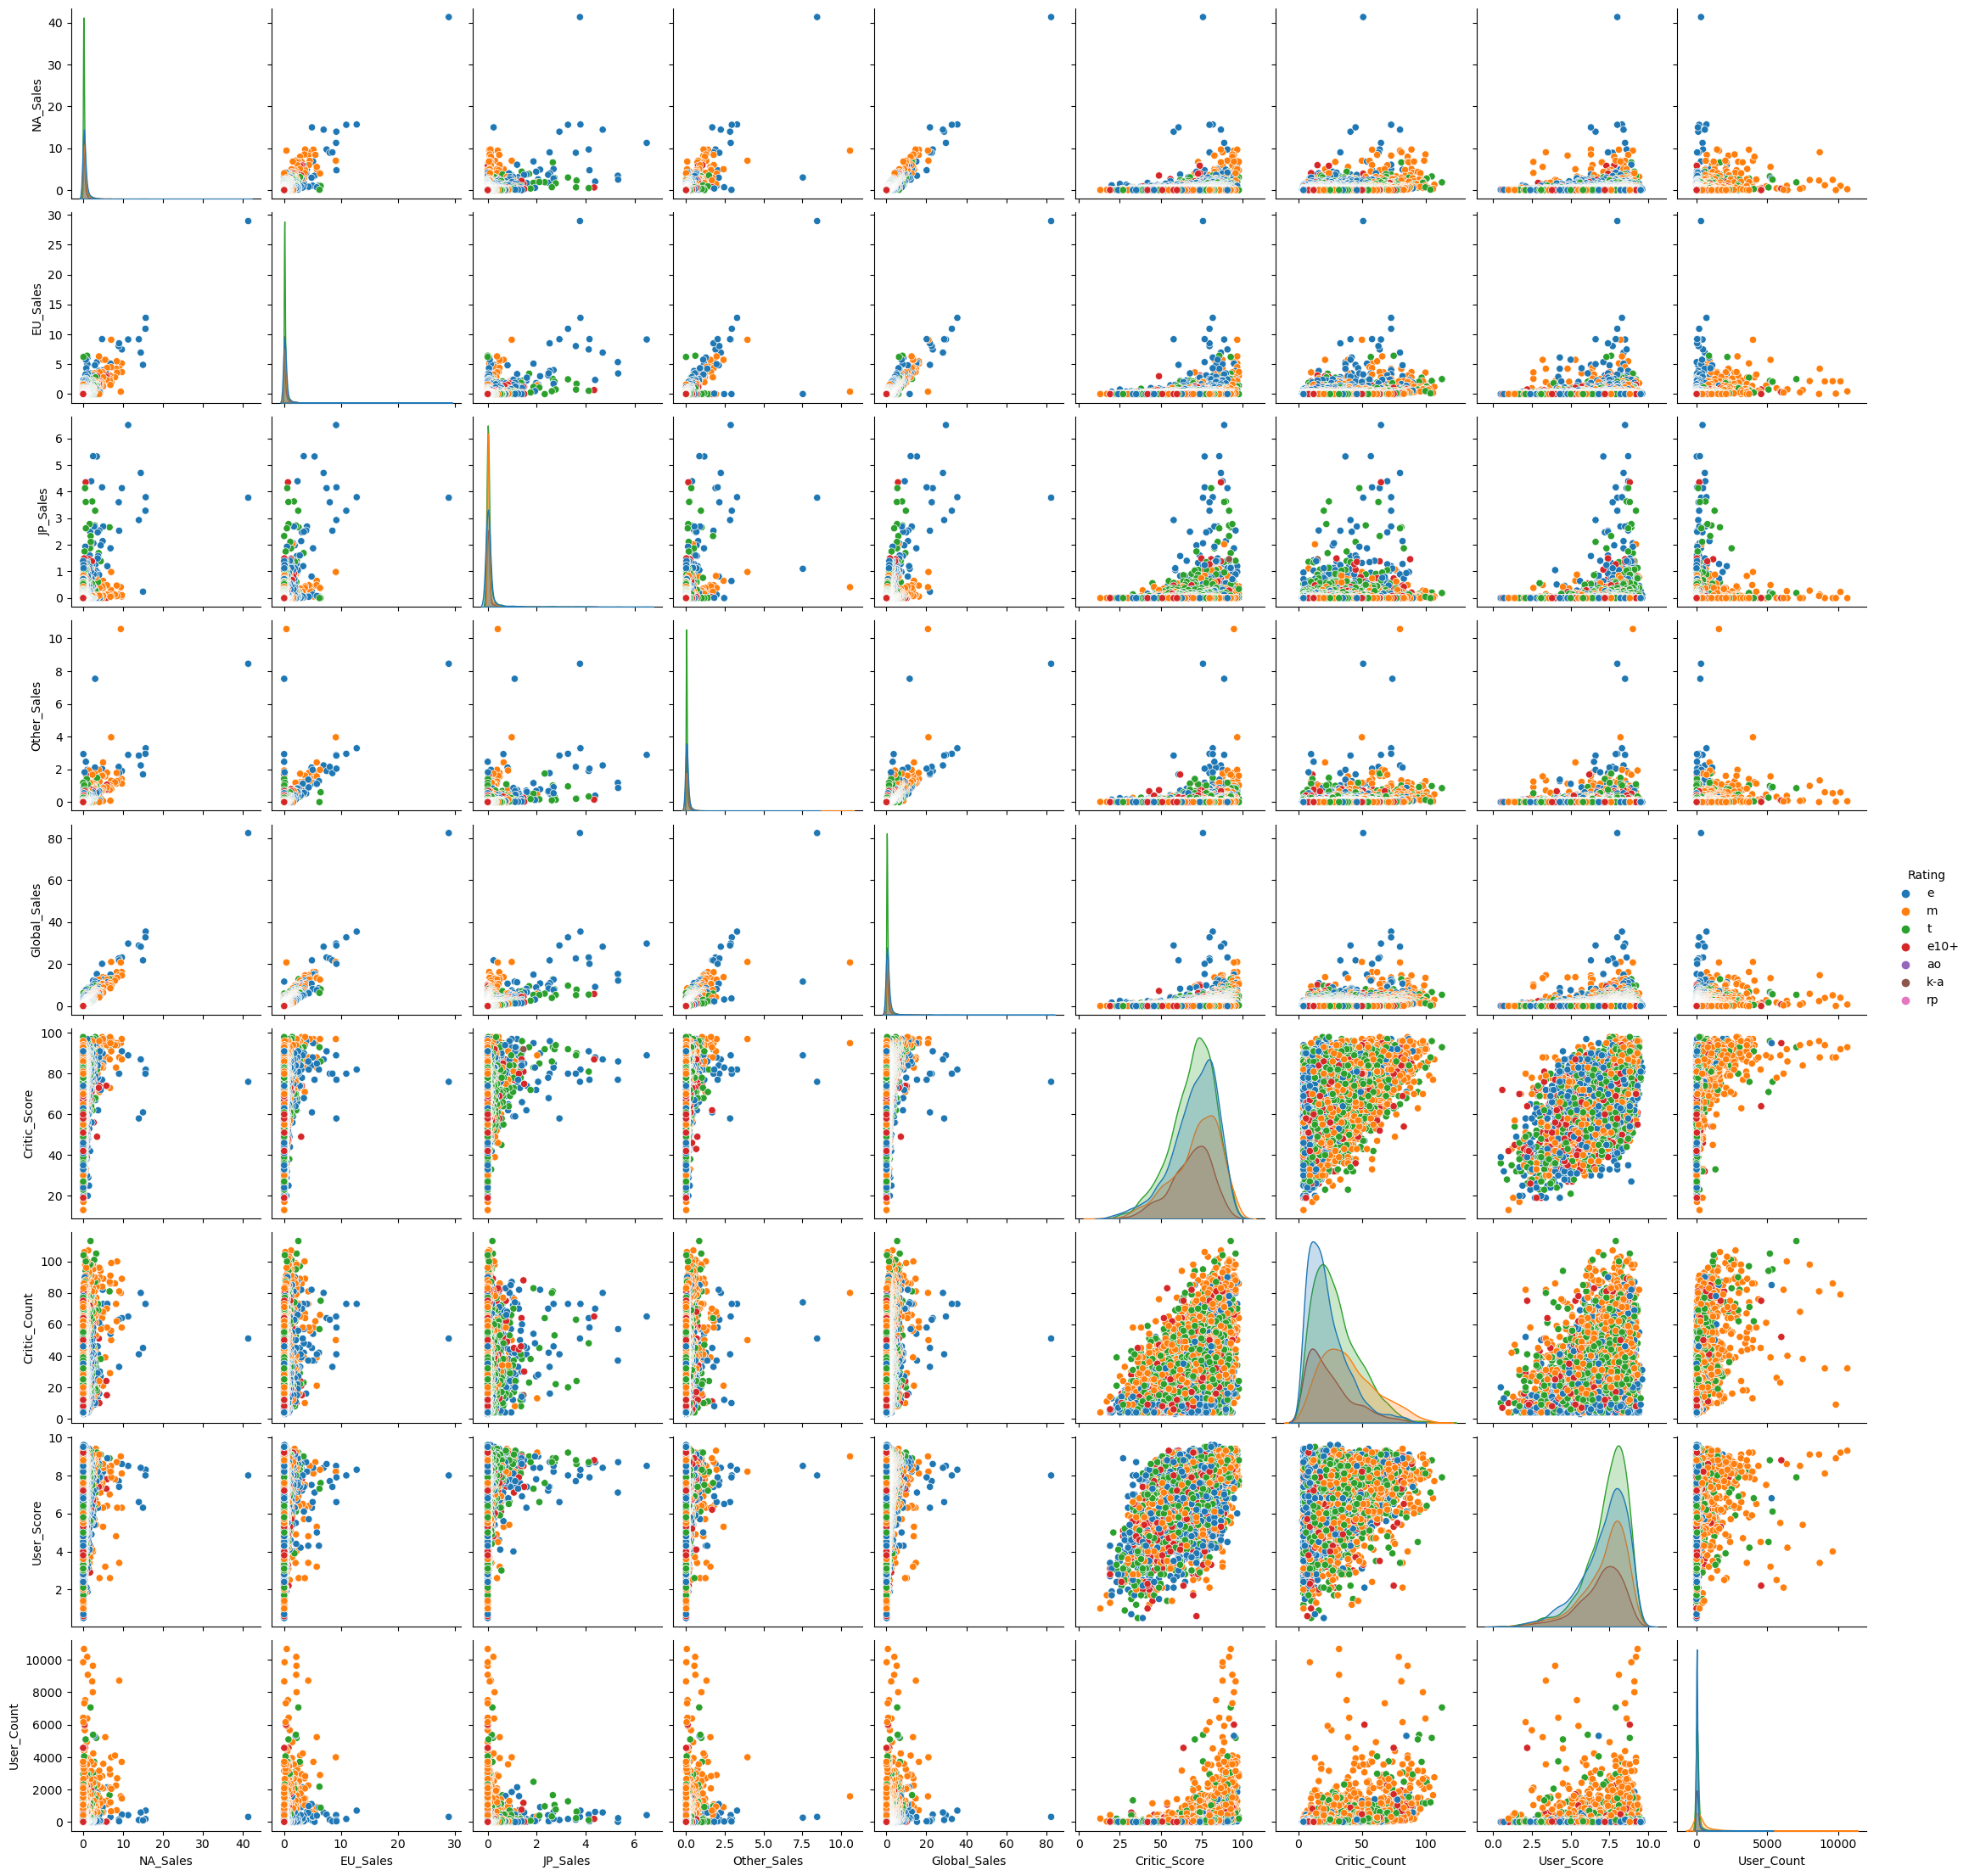

In [31]:
sns.pairplot(data, hue='Rating')

Insights:

* Sales columns data are having strong positive correlations with other, leading to colinearity
* Scores columns are having co-linearity

**N-C-N**

Desc Stats

In [32]:
round(data.groupby(['Genre', 'Rating'])['Global_Sales', 'User_Score'].mean(), 2)

Global_Sales  User_Score
Genre        Rating                          
action       ao              1.95        8.60
             e               0.74        6.74
             e10+            0.55        6.83
             m               1.04        7.31
             t               0.54        7.14
adventure    e               0.36        6.55
             e10+            0.22        6.38
             m               0.47        7.52
             t               0.20        7.46
fighting     e               0.15        6.35
             e10+            0.27        6.61
             m               0.62        7.30
             t               0.69        7.35
misc         e               1.36        6.76
             e10+            1.12        6.84
             k-a             1.92        7.40
             m               0.24        6.74
             t               0.78        6.98
platform     e               1.26        7.55
             e10+            0.50        6.89
             m               0.53        7.53
             t               0.41        7.52
puzzle       e               0.63        7.32
             e10+            0.87        7.18
             t               0.32        6.40
racing       e               0.93        7.16
             e10+            0.69        7.03
             m               0.29        5.29
             t               0.67        7.23
role-playing e               0.95        7.97
             e10+            0.50        7.40
             m               0.99        7.33
             t               0.60        7.72
shooter      e               0.10        7.64
             e10+            0.54        7.26
             m               1.16        7.00
             t               0.66        7.19
simulation   e               0.93        7.03
             e10+            0.61        6.89
             m               0.26        7.46
             t               0.55        7.35
sports       e               0.94        7.17
             e10+            0.65        6.62
             m               0.29        7.04
             t               0.69        7.02
strategy     e               0.38        7.35
             e10+            0.27        6.78
             m               0.22        7.03
             rp              0.03        6.80
             t               0.23        7.67

* Visual Analysis

In [33]:
px.bar(data,
       x="Global_Sales",
       y="Genre",
       color='Rating',
       orientation='h',
       hover_data=["User_Count", "User_Score"],
       height=400,
       title='Sales Analysis')

Insights:



* Action Genre having all Rating Types

**C-C-C**

In [34]:
pd.crosstab(data.Platform, [data.Genre, data.Rating])

Genre    action                  adventure              fighting  ...  \
Rating       ao   e e10+   m   t         e e10+   m   t        e  ...   
Platform                                                          ...   
3ds           0  16   22   5  11         2    2   2   3        0  ...   
dc            0   0    0   0   0         0    0   0   2        0  ...   
ds            0  24   34   2  15        11    5   1  14        0  ...   
gba           0  28    8   1  14         7    1   0   1        3  ...   
gc            0  15    7  16  31         6    1   2   4        0  ...   
pc            0  11   19  68  32         2    1  11  11        0  ...   
ps            0   9    0   9   9         2    0   3   0        3  ...   
ps2           0  23   23  98  99         7    3  15  15        0  ...   
ps3           0  13   38  96  81         1    3  13   2        0  ...   
ps4           0   4   14  34  29         0    1   6   5        0  ...   
psp           0   4    9  25  36         2    2   3   6        0  ...   
psv           0   1    7  11  18         1    2   6   1        0  ...   
wii           0  14   46  17  45         5    6   3   8        0  ...   
wiiu          0   6   16  10   7         0    1   0   0        0  ...   
x360          0  12   44  93  84         2    2   8   3        0  ...   
xb            1   8    3  45  62         1    2  10   5        0  ...   
xone          0   3    9  27   9         0    0   2   2        0  ...   

Genre    simulation sports             strategy                  
Rating            t      e e10+  m   t        e e10+   m rp   t  
Platform                                                         
3ds               2      4    0  0   0        0    1   0  0   2  
dc                1      1    0  0   0        0    0   0  0   0  
ds                5     20    1  0   1       10   14   0  0   3  
gba               1     18    0  0   1        4    1   0  0   1  
gc                7     55    1  1   9        3    0   0  0   4  
pc               51     25    1  0   2        9   21  13  1  71  
ps                1     14    0  0   2        1    0   0  0   3  
ps2              29    164    6  2  24        6    5   2  0  25  
ps3              15     89   15  0  11        1    3   2  0   2  
ps4               1     28    4  0   7        1    0   0  0   3  
psp               5     51    5  0   4        2    7   1  0   4  
psv               0      6    0  0   0        0    0   0  0   0  
wii               7     61   11  0   1        1    3   0  0   2  
wiiu              0      5    1  0   0        0    1   0  0   0  
x360             19     96   20  3  21        1    6   3  0   9  
xb               16     97    4  5  15        2    0   3  0   8  
xone              1     20    5  0   6        1    0   0  0   1  

[17 rows x 50 columns]

### Overall Insights On DataSet:<a id='insights'>
    
[Back to Menu](#menu)

**Single Column Study:**

* Top Platforms in the data are ps2, x360, ps3, pc contributing almost 50% of the data
* Data belongs from 1985 to 2016
    - Upto 1999 few games were sold, most of the game sales are happened after 1999
* Action, Sports, Shooter, Roleplaying Genre Games are having 50% of the data share
* Electronic Arts Publisher having Highest Games Count
* All the Sales average is less than 1 million
* Outliers present in most of numeric column data
* Most of the Games belongs to Teen, Everyone, Mature Ratings

**Study of Data between two or more columns**

* The data shows that there is positive correlation between Count vs Rating
    - when the count increases , rating might increase with a chance of 40%
* Adventure & Strategy Genres are having less average sales compared to other
* Sales columns data are having strong positive correlations with other, leading to colinearity
* Scores columns are having co-linearity